## Phishing Email Classification

In [43]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
#import data and print to check form
df = pd.read_csv('phishing_email_scaled.csv')
print(df.shape)
df.sample(5)

(11001, 3)


,Unnamed: 0,text_combined,label
4560,4560,pay much meds got condition require medication...,1
10716,10716,orig info sep ytd orig 371 969 canada ppa 316 ...,0
10469,10469,naturally irresistible corporate identity lt r...,1
676,676,wellhead adjustments daren please see attached...,0
2360,2360,fuel answer systems processes handle please le...,0


#### Code is all processed and formatted, now we pass through models for best classification model

(**Disclaimer:** *Switching data types for each 12000 rows of data takes a while, making this cell below run slower than usual (1-2 min). The memory allocated for the array would be exceeded if we used the full dataset given. We still get good accuracies with all the models, therefore making our scaling justified*.)

In [45]:
X = df['text_combined']
y = df['label']

print(type(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

<class 'pandas.core.series.Series'>


In [46]:
#create pipelines
pipeMNB = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

pipeCNB = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', ComplementNB())
])

pipeSVC = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

pipeDTC = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])

pipeRFC = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

pipeMLP = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MLPClassifier(max_iter=10, verbose=1))
])

#### Time to fit and train models and print accuracy scores

In [47]:
#MNB PipeLine
pipeMNB.fit(X_train, y_train)
#preds
MNBpredict = pipeMNB.predict(X_test)

#score
MNBscore = accuracy_score(y_test, MNBpredict)
print(f"MNB Accuracy: {MNBscore}")

MNB Accuracy: 0.8977737392094502


In [48]:
#CNB Pipeline
pipeCNB.fit(X_train, y_train)
#preds
CNBpredict = pipeCNB.predict(X_test)

CNBscore = accuracy_score(y_test, CNBpredict)
print(f"CNB Accuracy: {CNBscore}")

CNB Accuracy: 0.9482053611994548


In [49]:
#LinearSVC Pipeline
pipeSVC.fit(X_train, y_train)
#preds
SVCpredict = pipeSVC.predict(X_test)

SVCscore = accuracy_score(y_test, SVCpredict)
print(f"SVC Accuracy: {SVCscore}")

SVC Accuracy: 0.9940935938209905


In [50]:
#Decision Tree Pipeline
pipeDTC.fit(X_train, y_train)
#preds
DTCpredict = pipeDTC.predict(X_test)

DTCscore = accuracy_score(y_test, DTCpredict)
print(f"Decision Tree Classifier Accuracy: {DTCscore}")

Decision Tree Classifier Accuracy: 0.9572921399363925


In [51]:
#Random Forest Pipeline
pipeRFC.fit(X_train, y_train)
#preds
RFCpredict = pipeRFC.predict(X_test)

RFCscore = accuracy_score(y_test, RFCpredict)
print(f"Random Forest Accuracy: {RFCscore}")


Random Forest Accuracy: 0.9786460699681963


In [52]:
#MLP Pipeline
pipeMLP.fit(X_train, y_train)
#preds
MLPpredict = pipeMLP.predict(X_test)

MLPscore = accuracy_score(y_test, MLPpredict)
print(f"MLP Accuracy: {MLPscore}")

Iteration 1, loss = 0.51565320
Iteration 2, loss = 0.18602861
Iteration 3, loss = 0.07539991
Iteration 4, loss = 0.04026685
Iteration 5, loss = 0.02520079
Iteration 6, loss = 0.01749015
Iteration 7, loss = 0.01293810
Iteration 8, loss = 0.01002361
Iteration 9, loss = 0.00806311
Iteration 10, loss = 0.00671565
MLP Accuracy: 0.9950022716946842


c:\Program Files\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


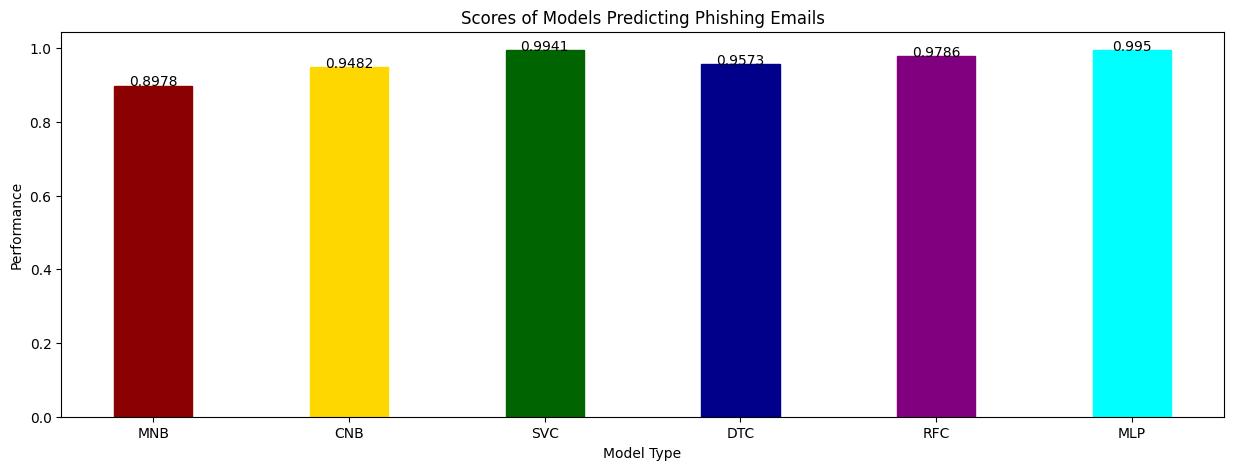

In [53]:
#Graph Performances based on training and testing
#Graphing performances of models
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

fig = plt.figure(figsize = (15, 5))
# creating the bar plot
xFeatures = ['MNB', 'CNB', 'SVC', 'DTC', 'RFC', 'MLP']
yFeatures = [round(MNBscore, 4), round(CNBscore, 4), round(SVCscore, 4), round(DTCscore, 4), round(RFCscore, 4), round(MLPscore, 4)]
bars = plt.bar(xFeatures, yFeatures, width = 0.4)
addlabels(xFeatures, yFeatures)
plt.xlabel("Model Type")
plt.ylabel("Performance")
plt.title("Scores of Models Predicting Phishing Emails")
bars[0].set_color('darkred')
bars[1].set_color('gold')
bars[2].set_color('darkgreen')
bars[3].set_color('darkblue')
bars[4].set_color('purple')
bars[5].set_color('cyan')
plt.show()